In [3]:
#Impotera Bibliotek
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
#Läsa in data
df = pd.read_csv(r"C:\Users\Marcie\ehandel_rapport\data\ecommerce_sales.csv")


In [5]:
#Visar de första 5 raderna i datan

df.head()


,order_id,date,city,category,price,units,revenue
0,100000,2024-04-19,Stockholm,Sports,530.95,4,2123.80
1,100001,2024-05-06,Malmö,Sports,653.28,3,1959.84
2,100002,2024-03-07,Uppsala,Clothing,177.98,4,711.92
3,100003,2024-04-08,Göteborg,Home,348.57,3,1045.71
4,100004,2024-01-18,Uppsala,Electronics,777.07,3,2331.21


In [6]:
#Gör om datumkolumnen
df["date"] = pd.to_datetime(df["date"])


In [7]:
#Skapa tidskolumner
df["month"] = df["date"].dt.month
df["weekday"] = df["date"].dt.day_name()


In [8]:
#Sortera veckodagar i rätt ordning
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
df["weekday"] = pd.Categorical(df["weekday"], categories=weekday_order, ordered=True)


Grupp och beräkna försäljning över tid

In [9]:
#Försäljning per månad:
sales_by_month = df.groupby("month")["revenue"].sum()
print(sales_by_month)


month
1    664083.32
2    548462.03
3    487602.00
4    580194.83
5    632165.16
6    590259.89
Name: revenue, dtype: float64


In [10]:
#Försäljning per veckodag:
sales_by_day = df.groupby("weekday")["revenue"].sum()
print(sales_by_day)


weekday
Monday       527263.73
Tuesday      512978.35
Wednesday    502661.61
Thursday     518871.71
Friday       501396.53
Saturday     481483.77
Sunday       458111.53
Name: revenue, dtype: float64


C:\Users\Marcie\AppData\Local\Temp\ipykernel_11164\3882246632.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_by_day = df.groupby("weekday")["revenue"].sum()


#Tidsmönster i försäljningen (När säljer vi?)
Visualisera (minst två diagram)

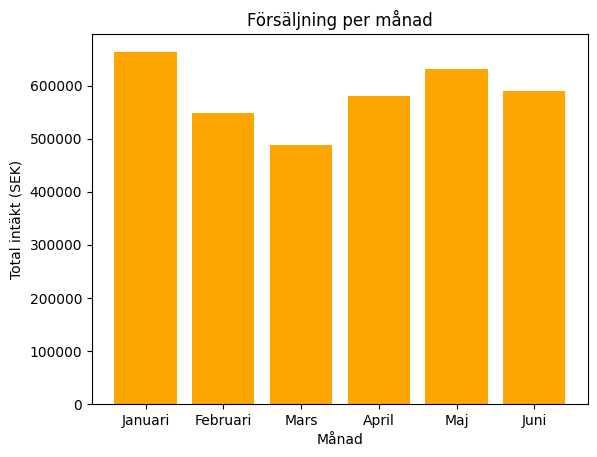

In [16]:
# Skapa diagram för de första sex månaderna
månadsnamn = ["Januari","Februari","Mars","April","Maj","Juni"]
data = df.groupby("month")["revenue"].sum().head(6)

plt.bar(månadsnamn, data, color="orange")
plt.title("Försäljning per månad")
plt.xlabel("Månad")
plt.ylabel("Total intäkt (SEK)")
plt.show()

### Försäljning per månad
Grafen visar att intäkterna är något högre i januari och juni, vilket kan tyda på säsongseffekter. Januari kan påverkas av rea-perioder efter jul, medan juni kan kopplas till sommarhandel och semestertider.

**Tolkning:**  
Försäljningen är stabil under året men något starkare i början och mitten av året.



C:\Users\Marcie\AppData\Local\Temp\ipykernel_11164\3474020422.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_by_day = df.groupby("weekday")["revenue"].sum()


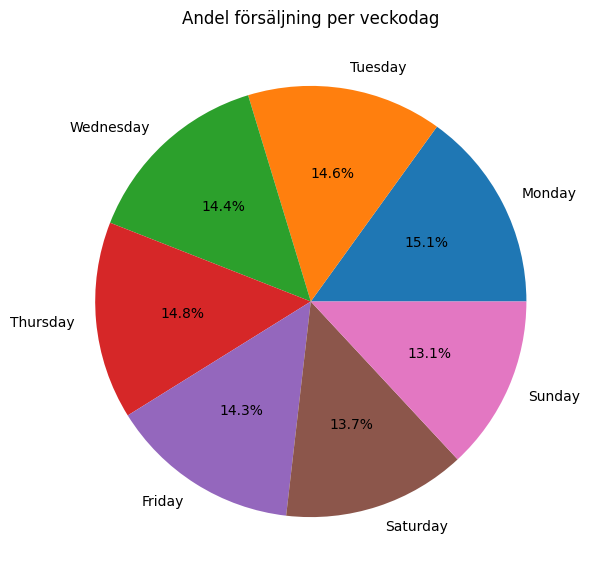

In [13]:
# Grupp och summera försäljning per veckodag
sales_by_day = df.groupby("weekday")["revenue"].sum()

# Rita cirkeldiagram
sales_by_day.plot(kind="pie", autopct="%1.1f%%", figsize=(7,7), title="Andel försäljning per veckodag")
plt.ylabel("")  # Tar bort etiketten på sidan
plt.show()



### Andel försäljning per veckodag
Cirkeldiagrammet visar att måndagar står för den största andelen försäljning (cirka 15 %), medan helgerna (lördag och söndag) har något lägre nivåer runt 13 %. De övriga vardagarna ligger relativt jämnt.

**Tolkning:**  
Kunder tenderar att handla mer i början av veckan, troligen efter helgen eller vid start av arbetsveckan.



#Rekommendationer
- Planera kampanjer och annonser till måndagar och tisdagar.  
- Satsa extra på kampanjer under januari och juni.  
- Följ säsongstrenderna för att optimera kampanjperioder framöver.